In [1]:
import scipy.misc
import numpy as np
import cv2

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm

from keras.models import Sequential
from keras.layers import Conv2D,Activation

Using TensorFlow backend.


In [2]:
# load color image 
img_path='conv-visualization/images/Violin_VL100.png'
bgr_img=cv2.imread(img_path)

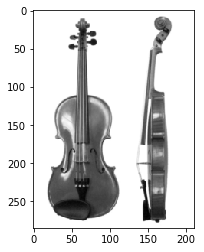

In [3]:
# preprocess image
gray_img=cv2.cvtColor(bgr_img,cv2.COLOR_BGR2GRAY) # convert to grayscale
small_img=scipy.misc.imresize(gray_img,0.3) # resize to smaller
small_img=small_img.astype("float32")/255 # rescale entries to lie in [0,1]

# plot image
plt.imshow(small_img,cmap='gray');

In [4]:
# define filters
filter_vals=np.array([[-1,-1,1,1],[-1,-1,1,1],[-1,-1,1,1],[-1,-1,1,1]])

filter_1=filter_vals
filter_2=-filter_1
filter_3=filter_1.T
filter_4=-filter_3
filters=[filter_1,filter_2,filter_3,filter_4]

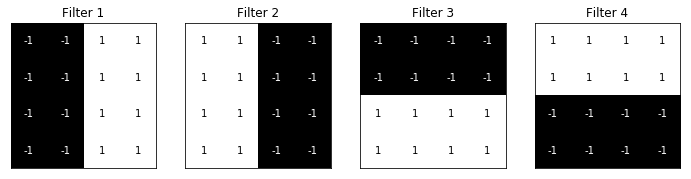

In [5]:
# visualize all filters
fig=plt.figure(figsize=(12,6))
for i in range(4):
    ax=fig.add_subplot(1,4,i+1,xticks=[],yticks=[])
    ax.imshow(filters[i],cmap='gray')
    ax.set_title('Filter {}'.format(str(i+1)))
    width,height=filters[i].shape
    for x in range(width):
        for y in range(height):
            ax.annotate(str(filters[i][x][y]),xy=(y,x),horizontalalignment='center',verticalalignment='center',
                        color='white' if filters[i][x][y]<0 else 'black')

In [6]:
# define a neural network with a single convolutional layer with one filter
model=Sequential()
model.add(Conv2D(filters=1,kernel_size=4,padding='same',input_shape=(small_img.shape[0],small_img.shape[1],1)))
model.add(Activation('relu'))

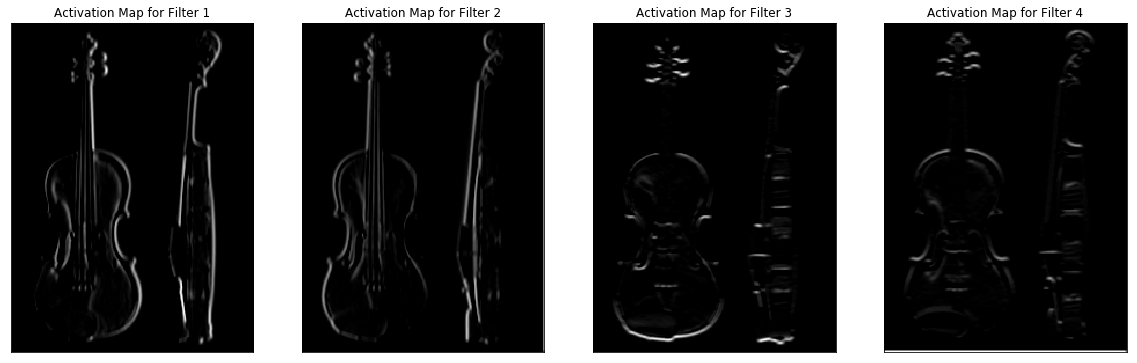

In [7]:
# visualize all activation maps
fig=plt.figure(figsize=(20,20))
for i in range(4):
    ax=fig.add_subplot(1,4,i+1,xticks=[],yticks=[])
    model.layers[0].set_weights([np.reshape(filters[i],(4,4,1,1)),np.array([0])])
    ax.imshow(np.squeeze(model.predict(np.reshape(small_img,(1,small_img.shape[0],small_img.shape[1],1)))),cmap='gray')
    ax.set_title('Activation Map for Filter %s'%str(i+1))